In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_regrets
from experiment import experiments_to_df

### Эксперимент

In [2]:
dir = '../results/'
file = 'experiment_0.json'

seeds = 5 * np.arange(2, 4) + 111

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 3,
                length = 20,
                lower_bound = 1,
                upper_bound = 4,
                alternating=True)

different_noises = [0.01, 1, 100]
different_windows = [5, 20]
different_wf = ["default"]
different_af = ["default"]


experiments, df = run_experiments(dir + file, seeds, params, different_noises, different_windows, different_wf, different_af)
# experiments, df = load_experiments(dir + file)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 1611.16it/s]


In [5]:
# with open(dir + Path('info_' + file).with_suffix('').as_posix(), 'w') as f:
#     f.write(_ih[2])

In [6]:
df

,noise_var,train_window,weight_function,alpha_function,regret,random_0,random_1
0,0.01,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),5062.17,5964.85,4159.49
1,0.01,5,1 / (x^1.01),1 / (x + 1),3989.68,4212.25,3767.12
2,0.01,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),4963.30,5698.94,4227.67
3,0.01,20,1 / (x^1.01),1 / (x + 1),4161.48,4407.52,3915.44
4,1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),5122.86,5861.13,4384.6
5,1,5,1 / (x^1.01),1 / (x + 1),4034.48,4111.35,3957.62
6,1,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),4964.69,5580.26,4349.12
7,1,20,1 / (x^1.01),1 / (x + 1),4123.08,4221.64,4024.53
8,100,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),7477.35,5404.01,9550.69
9,100,5,1 / (x^1.01),1 / (x + 1),7485.68,6828.04,8143.33


In [7]:
df_w = df[df["alpha_function"] == alpha_hypers["default"].repr].iloc[:,:5]
df_w

,noise_var,train_window,weight_function,alpha_function,regret
0,0.01,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),5062.17
1,0.01,5,1 / (x^1.01),1 / (x + 1),3989.68
2,0.01,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),4963.30
3,0.01,20,1 / (x^1.01),1 / (x + 1),4161.48
4,1,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),5122.86
5,1,5,1 / (x^1.01),1 / (x + 1),4034.48
6,1,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),4964.69
7,1,20,1 / (x^1.01),1 / (x + 1),4123.08
8,100,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),7477.35
9,100,5,1 / (x^1.01),1 / (x + 1),7485.68


In [8]:
df_a = df[df["weight_function"] == weight_hypers["simple_101"].repr].iloc[:,:5]
df_a

,noise_var,train_window,weight_function,alpha_function,regret
1,0.01,5,1 / (x^1.01),1 / (x + 1),3989.68
3,0.01,20,1 / (x^1.01),1 / (x + 1),4161.48
5,1,5,1 / (x^1.01),1 / (x + 1),4034.48
7,1,20,1 / (x^1.01),1 / (x + 1),4123.08
9,100,5,1 / (x^1.01),1 / (x + 1),7485.68
11,100,20,1 / (x^1.01),1 / (x + 1),5956.28


In [10]:
df[["noise_var", "train_window", "regret"]].groupby(["noise_var", "train_window"]).mean()

regret
noise_var train_window          
0.01      5             4525.925
          20            4562.390
1.00      5             4578.670
          20            4543.885
100.00    5             7481.515
          20            6261.375

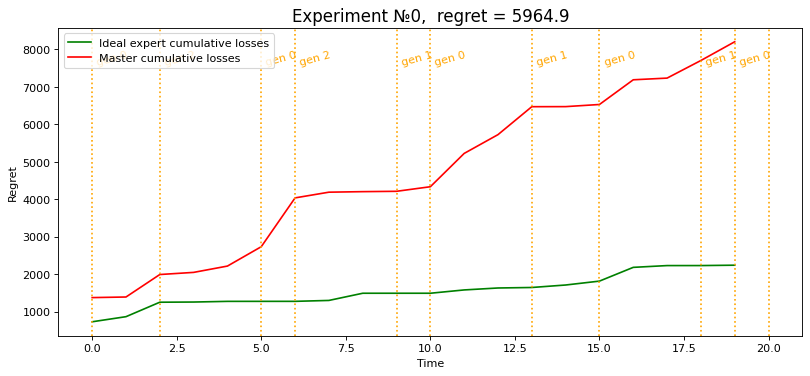

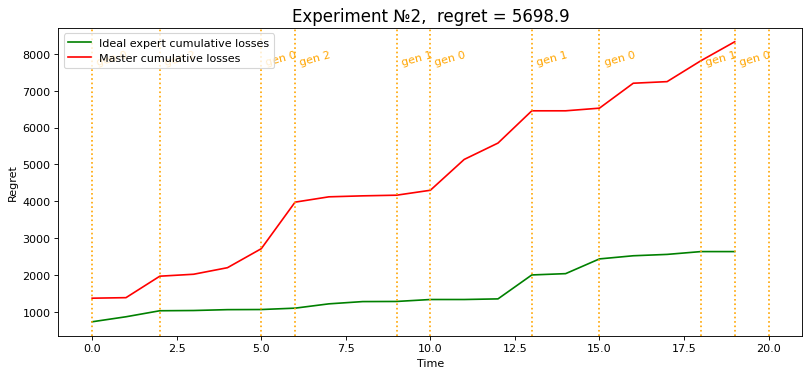

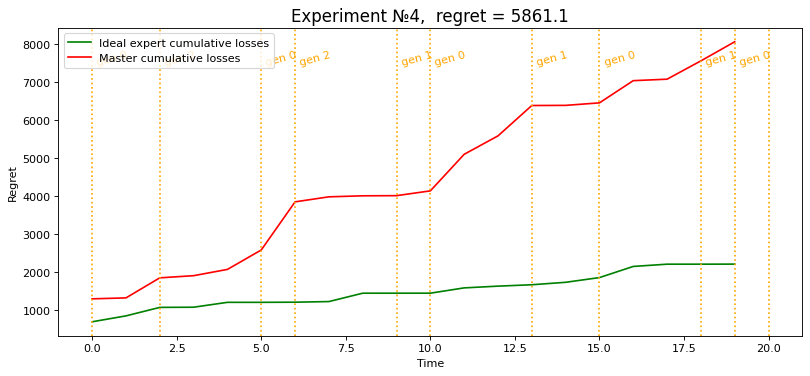

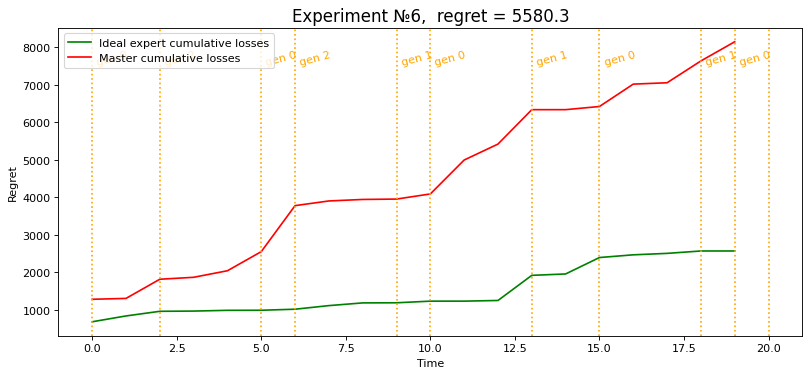

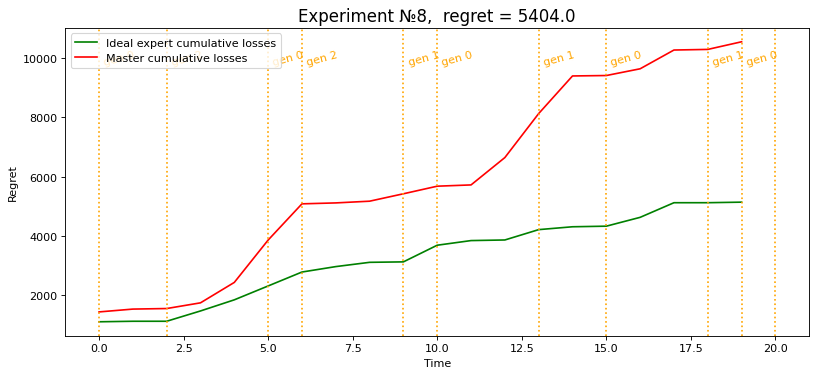

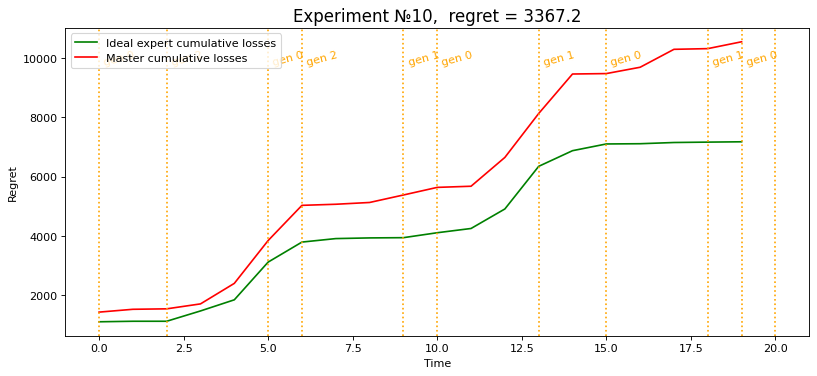

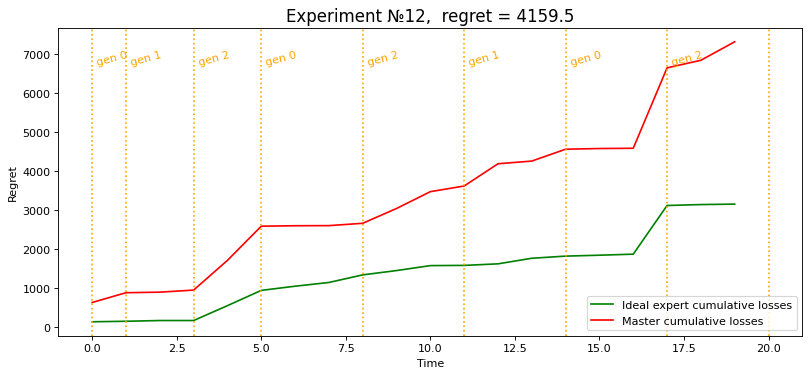

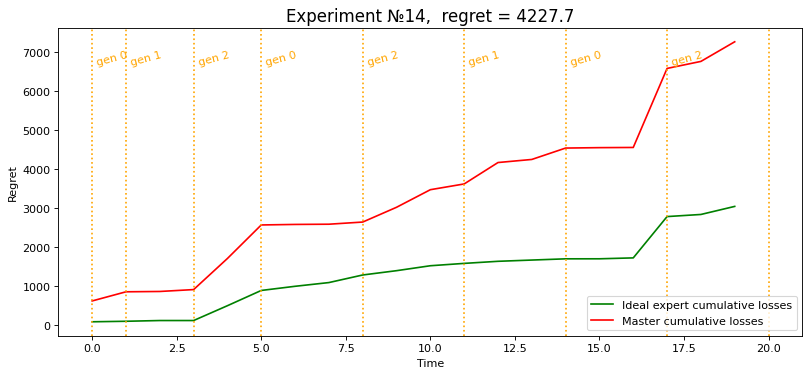

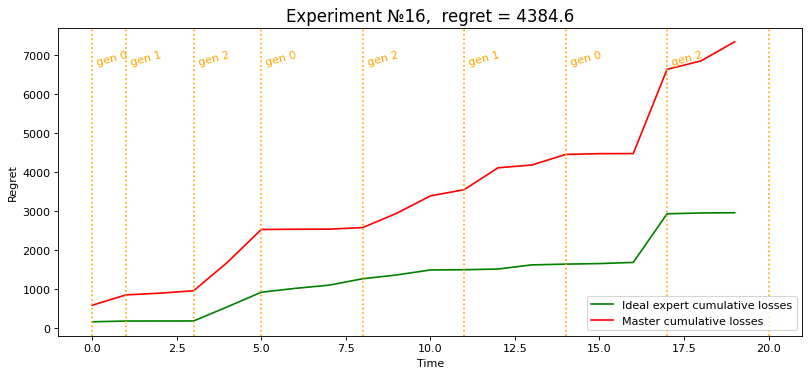

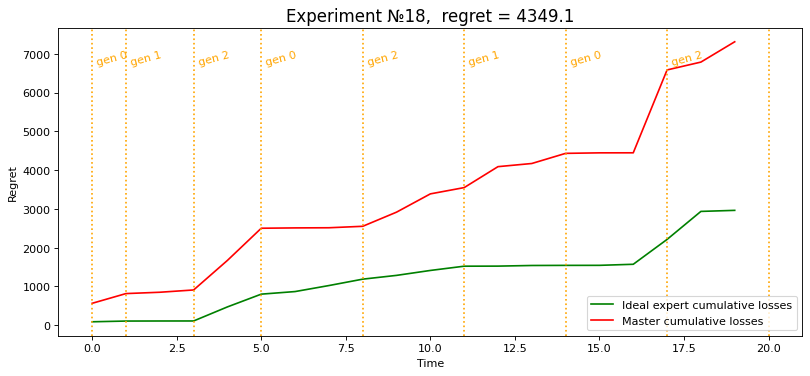

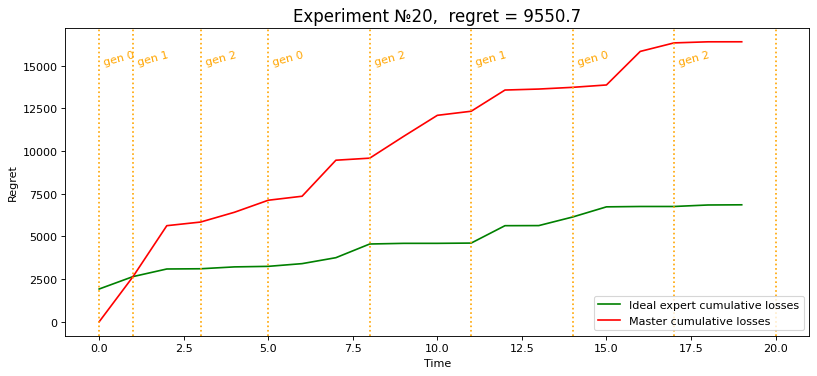

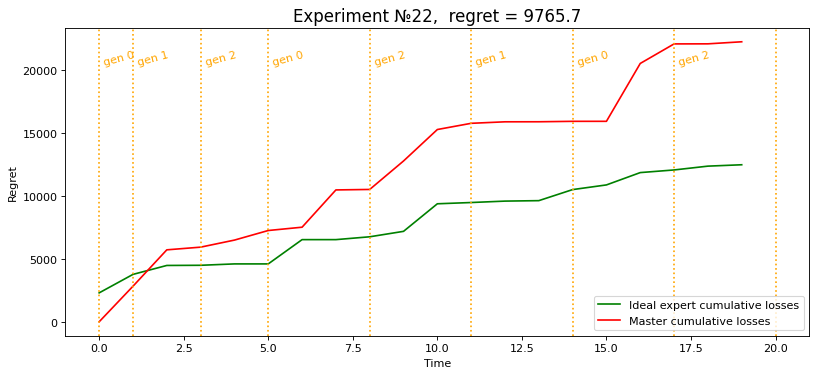

In [11]:
enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
for num, experiment in enumerated[::2]:
    draw_regrets(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))